On my honor, as a student, I have neither given nor received unauthorized aid on this academic work - Ben Tjiang

Team members: Ben Tjiang

# Business and data understanding (e.g., problem statement, business contexts, the significance of the problem, the business value of the solution

We are trying to figure out the variables that have the most impact on the likelihood of a season ticket holder to renew or defect. In business context, we are looking to increase our retention rate by discovering who is the most likely to leave so that we can direct marketing efforts towards them in hopes that they will renew instead of defection. The significance of this problem is that we can increase our revenue by a vast amount by identifying the people we will need to target for marketing efforts to renew. The business value of the solution is very high, if we accomplish our task we will see season ticket sales rise substantially. 

In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data processing (ETL): A variety of ETL techniques should be used.

In [515]:
#Reading in data
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [516]:
#Getting info on data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [517]:
#Converting data types to ints/floats
df['CHILD'] = df['CHILD'].convert_objects(convert_numeric=True)
df['AGE'] = df['AGE'].convert_objects(convert_numeric=True)
df['INCOME'] = df['INCOME'].convert_objects(convert_numeric=True)
df['GNDR'] = df['GNDR'].convert_objects(convert_numeric=True)
df['OWNHOME'] = df['OWNHOME'].convert_objects(convert_numeric=True)
df['COMP'] = df['COMP'].convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_

In [518]:
#Filling empty fields
df = df.fillna({'CHILD': 0})
df = df.fillna({'SPORT': 0})
df = df.fillna({'AGE': 0})
df = df.fillna({'INCOME': 0})
df = df.fillna({'GNDR': 0})
df = df.fillna({'OWNHOME': 0})
df = df.fillna({'COMP': 0})

In [519]:
#drop FAKEID column
df = df.drop('FAKEID', axis = 1)

In [520]:
#check if any null values
df.isnull().sum()

Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
CHILD       0
GNDR        0
OWNHOME     0
SPORT       0
COMP        0
PCTMARR     0
HOMEVAL     0
dtype: int64

In [521]:
#Checking data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 18 columns):
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
CHILD       9216 non-null float64
GNDR        9216 non-null float64
OWNHOME     9216 non-null float64
SPORT       9216 non-null float64
COMP        9216 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11)
memory usage: 1.3 MB


In [522]:
#taking a look at data
df.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,0.0,1.0,0.0,0.0,77,203
1,1,0,0,1,0,1,15,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53,68
2,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,0.0,1.0,0.0,0.0,50,38
3,1,1,0,1,0,1,15,4,0,62.0,4.0,0.0,1.0,1.0,0.0,1.0,60,68
4,0,0,0,1,0,0,15,5,0,89.0,4.0,0.0,1.0,1.0,0.0,0.0,65,194


In [523]:
#preliminary correlation analysis
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.030358,-0.001776,-0.004461,0.007248,-0.017937,0.011944,0.019113,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.035950,0.014043,-0.002970,-0.005599,0.005646,0.005457,-0.025772,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.032728,0.030565,0.027552,0.002400,0.018561,0.017533,0.010344,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.053437,-0.003356,0.003181,0.000198,-0.013655,-0.002252,0.017739,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.098230,-0.010031,-0.021048,-0.009714,-0.007112,0.003123,-0.032698,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.082640,-0.022793,-0.035275,-0.025717,-0.001132,0.004151,-0.017788,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,0.001685,0.049080,0.001339,0.042429,-0.006664,0.010261,0.012499,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.205889,-0.073361,-0.061164,-0.020403,-0.020362,-0.022063,-0.076235,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.107669,-0.073414,-0.047185,-0.029201,-0.026875,-0.020048,-0.045798,0.032558,-0.064727
AGE,-0.030358,0.035950,-0.032728,-0.053437,0.098230,0.082640,0.001685,0.205889,0.107669,1.000000,0.151618,-0.025282,0.059389,0.273927,0.037989,-0.008362,0.020758,-0.000994


# Data visualization: This section includes many charts, pivot tables, and other visualizations using matplotlib, seaborn, groupby, pivot, etc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003A776630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003348DA90>]], dtype=object)

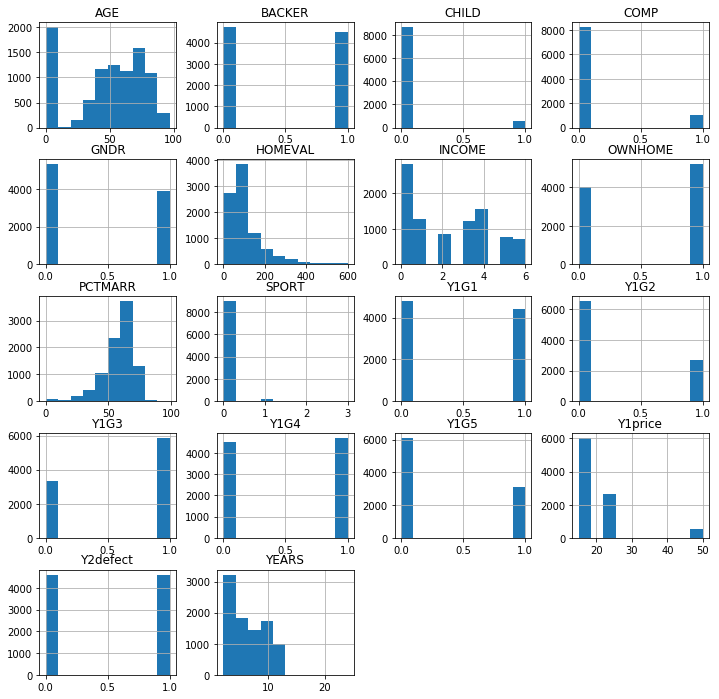

In [524]:
#Visualization through histograms
df.hist(figsize=(12,12))

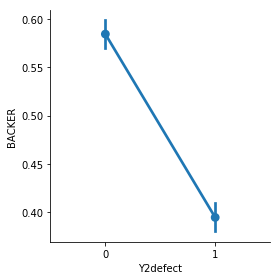

In [525]:
#Visualization through factorplot
sns.factorplot('Y2defect', 'BACKER', data = df)

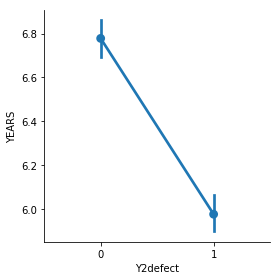

In [526]:
#Visualization through factorplot
sns.factorplot('Y2defect', 'YEARS', data = df)

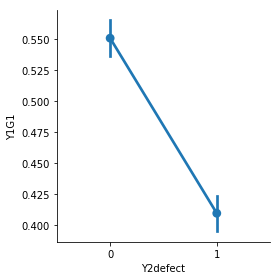

In [527]:
#Visualization through factorplot
sns.factorplot('Y2defect', 'Y1G1', data = df)

Y2defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

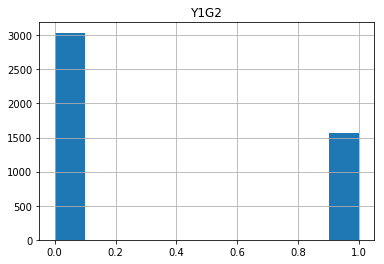

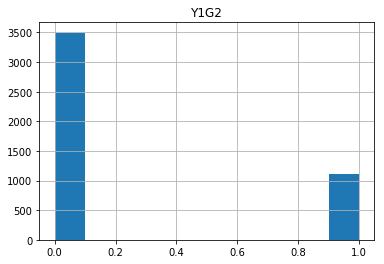

In [528]:
#Visualization by groupby
df.groupby('Y2defect').hist('Y1G2')

Y2defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

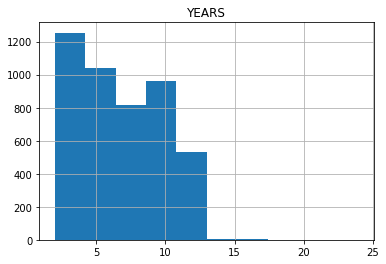

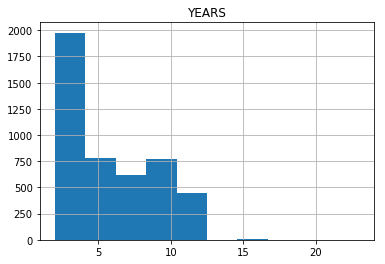

In [529]:
#Visualization by groupby
df.groupby('Y2defect').hist('YEARS')

Y2defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

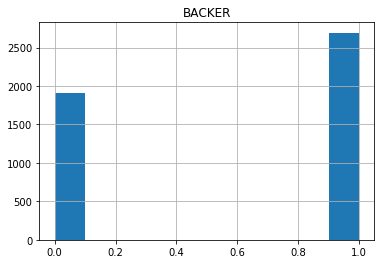

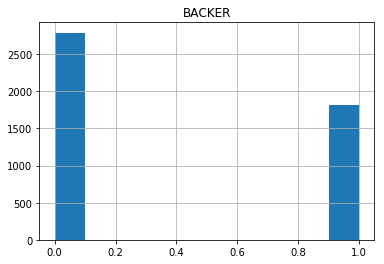

In [530]:
#Visualization by groupby
df.groupby('Y2defect').hist('BACKER')

In [531]:
#Visualization by groupby
df.groupby(['Y2defect','YEARS']).count()

Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  BACKER   AGE  INCOME  \
Y2defect YEARS                                                                
0        2         3     3     3     3     3        3       3     3       3   
         3       671   671   671   671   671      671     671   671     671   
         4       580   580   580   580   580      580     580   580     580   
         5       456   456   456   456   456      456     456   456     456   
         6       585   585   585   585   585      585     585   585     585   
         7       495   495   495   495   495      495     495   495     495   
         8       320   320   320   320   320      320     320   320     320   
         9       492   492   492   492   492      492     492   492     492   
         10      467   467   467   467   467      467     467   467     467   
         11      529   529   529   529   529      529     529   529     529   
         12        2     2     2     2     2        2       2     2       2   
         13        1     1     1     1     1        1       1     1       1   
         14        2     2     2     2     2        2       2     2       2   
         16        2     2     2     2     2        2       2     2       2   
         19        1     1     1     1     1        1       1     1       1   
         21        1     1     1     1     1        1       1     1       1   
         24        1     1     1     1     1        1       1     1       1   
1        2       242   242   242   242   242      242     242   242     242   
         3      1193  1193  1193  1193  1193     1193    1193  1193    1193   
         4       542   542   542   542   542      542     542   542     542   
         5       379   379   379   379   379      379     379   379     379   
         6       402   402   402   402   402      402     402   402     402   
         7       369   369   369   369   369      369     369   369     369   
         8       250   250   250   250   250      250     250   250     250   
         9       395   395   395   395   395      395     395   395     395   
         10      379   379   379   379   379      379     379   379     379   
         11      445   445   445   445   445      445     445   445     445   
         12        3     3     3     3     3        3       3     3       3   
         13        1     1     1     1     1        1       1     1       1   
         14        1     1     1     1     1        1       1     1       1   
         15        2     2     2     2     2        2       2     2       2   
         16        1     1     1     1     1        1       1     1       1   
         18        2     2     2     2     2        2       2     2       2   
         19        1     1     1     1     1        1       1     1       1   
         23        1     1     1     1     1        1       1     1       1   

                CHILD  GNDR  OWNHOME  SPORT  COMP  PCTMARR  HOMEVAL  
Y2defect YEARS                                                       
0        2          3     3        3      3     3        3        3  
         3        671   671      671    671   671      671      671  
         4        580   580      580    580   580      580      580  
         5        456   456      456    456   456      456      456  
         6        585   585      585    585   585      585      585  
         7        495   495      495    495   495      495      495  
         8        320   320      320    320   320      320      320  
         9        492   492      492    492   492      492      492  
         10       467   467      467    467   467      467      467  
         11       529   529      529    529   529      529      529  
         12         2     2        2      2     2        2        2  
         13         1     1        1      1     1        1        1  
         14         2     2        2      2     2        2        2  
         16         2     2        2      

In [532]:
#Visualization by groupby
df.groupby(['Y2defect','BACKER']).count()

Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS   AGE  INCOME  \
Y2defect BACKER                                                               
0        0       1915  1915  1915  1915  1915     1915   1915  1915    1915   
         1       2693  2693  2693  2693  2693     2693   2693  2693    2693   
1        0       2790  2790  2790  2790  2790     2790   2790  2790    2790   
         1       1818  1818  1818  1818  1818     1818   1818  1818    1818   

                 CHILD  GNDR  OWNHOME  SPORT  COMP  PCTMARR  HOMEVAL  
Y2defect BACKER                                                       
0        0        1915  1915     1915   1915  1915     1915     1915  
         1        2693  2693     2693   2693  2693     2693     2693  
1        0        2790  2790     2790   2790  2790     2790     2790  
         1        1818  1818     1818   1818  1818     1818     1818

In [533]:
#Visualization by groupby
df.groupby(['Y2defect']).count()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
Y2defect,,,,,,,,,,,,,,,,,
0,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608
1,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608


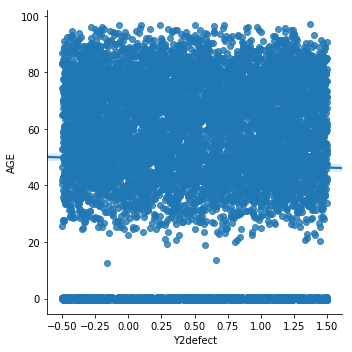

In [534]:
#Visualization by SNS
sns.lmplot("Y2defect", "AGE", df, x_jitter=.50,y_jitter=.50)

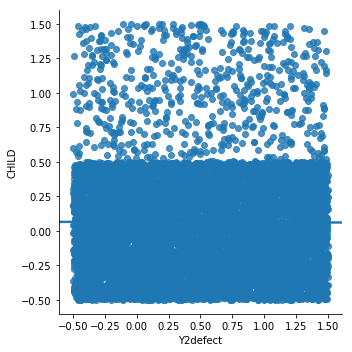

In [535]:
#Visualization by SNS
sns.lmplot("Y2defect", "CHILD", df, x_jitter=.50,y_jitter=.50)

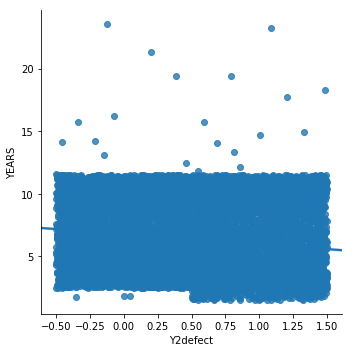

In [536]:
#Visualization by SNS
sns.lmplot("Y2defect", "YEARS", df, x_jitter=.50,y_jitter=.50)

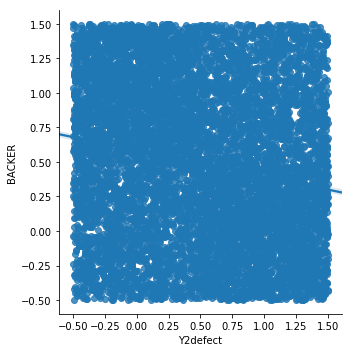

In [537]:
#Visualization by SNS
sns.lmplot("Y2defect", "BACKER", df, x_jitter=.50,y_jitter=.50)

# Exploratory data analysis: This section includes correlation analysis, pairwise heatmaps, and statistical hypothesis tests (e.g., t-testing, ANOVA)

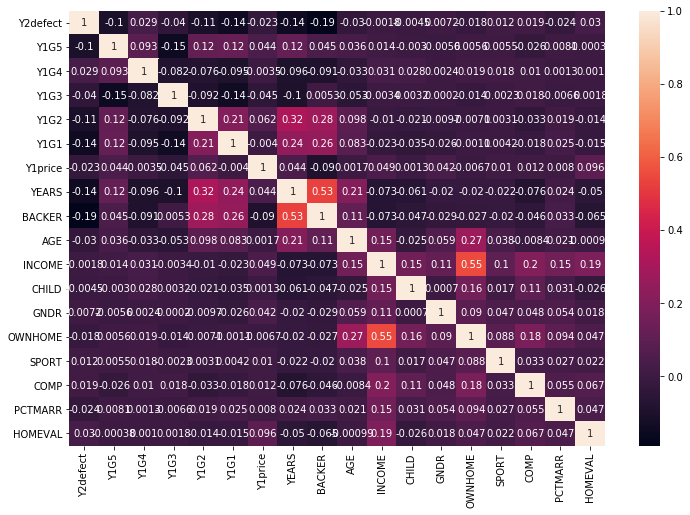

In [538]:
#correlation heatmap for data visualization
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [539]:
#printing out the correlation in text form
print df.corr()

          Y2defect      Y1G5      Y1G4      Y1G3      Y1G2      Y1G1  \
Y2defect  1.000000 -0.101921  0.028869 -0.040159 -0.109634 -0.141604   
Y1G5     -0.101921  1.000000  0.092901 -0.150656  0.116103  0.123291   
Y1G4      0.028869  0.092901  1.000000 -0.082485 -0.076326 -0.094967   
Y1G3     -0.040159 -0.150656 -0.082485  1.000000 -0.091538 -0.135977   
Y1G2     -0.109634  0.116103 -0.076326 -0.091538  1.000000  0.206763   
Y1G1     -0.141604  0.123291 -0.094967 -0.135977  0.206763  1.000000   
Y1price  -0.023498  0.043975 -0.003481 -0.045239  0.061990 -0.003982   
YEARS    -0.139099  0.121479 -0.095750 -0.100829  0.320802  0.244241   
BACKER   -0.189929  0.045319 -0.090743  0.005308  0.276530  0.256153   
AGE      -0.030358  0.035950 -0.032728 -0.053437  0.098230  0.082640   
INCOME   -0.001776  0.014043  0.030565 -0.003356 -0.010031 -0.022793   
CHILD    -0.004461 -0.002970  0.027552  0.003181 -0.021048 -0.035275   
GNDR      0.007248 -0.005599  0.002400  0.000198 -0.009714 -0.02

# Model building: This is a critical part of your project. You use a variety of
# classifiers (or algorithms) and build multiple models

In [540]:
#assigning variables
y = df['Y2defect']
X = df[['BACKER', 'YEARS']]

In [541]:
#Setting test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [542]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [543]:
#print decision tree results
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.59349005425
[[1048  315]
 [ 809  593]]
             precision    recall  f1-score   support

          0       0.56      0.77      0.65      1363
          1       0.65      0.42      0.51      1402

avg / total       0.61      0.59      0.58      2765

0.595929669699


In [544]:
#KNN TEST
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

In [545]:
#KNN TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()    #  n_neighbors=5 by default
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [546]:
#PRINT KNN TEST
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.513200723327
[[733 630]
 [716 686]]
             precision    recall  f1-score   support

          0       0.51      0.54      0.52      1363
          1       0.52      0.49      0.50      1402

avg / total       0.51      0.51      0.51      2765

0.513542648957


In [547]:
#SPLIT VALIDATION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [548]:
#PRINT SPLIT VALIDATION
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.586618444846
--------------------------------------------------------
[[840 523]
 [620 782]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.62      0.60      1363
          1       0.60      0.56      0.58      1402

avg / total       0.59      0.59      0.59      2765

--------------------------------------------------------
0.587031104292


In [549]:
#assigning variables
y = df['Y2defect']
X = df[['BACKER', 'YEARS']]

In [550]:
#print decision tree results
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 17 

In [551]:
#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [552]:
#print decision tree results
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.59349005425
--------------------------------------------------------
[[1048  315]
 [ 809  593]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.56      0.77      0.65      1363
          1       0.65      0.42      0.51      1402

avg / total       0.61      0.59      0.58      2765

--------------------------------------------------------
0.595929669699


In [553]:
#assign variables
y = df['Y2defect']
X = df[['BACKER', 'Y1G1']]

In [554]:
#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [555]:
#print decision tree results
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.592043399638
--------------------------------------------------------
[[798 565]
 [563 839]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.59      0.59      0.59      1363
          1       0.60      0.60      0.60      1402

avg / total       0.59      0.59      0.59      2765

--------------------------------------------------------
0.59195201698


# Model selection and evaluation (e.g., feature selection, validation, accuracy): The project must apply multiple feature selection methods and validation techniques (split, 10-fold cross validation) and report the accuracy and AUC score of each model. Finally, you decide “the best model” for the client

In [556]:
#assign variables
y = df['Y2defect']
X = df[['Y1G1', 'YEARS']]

In [557]:
#set test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [558]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [559]:
# declare X variables and y variable
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

In [560]:
#view x head
X.head(2)

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,0.0,1.0,0.0,0.0,77,203
1,0,0,1,0,1,15,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53,68


In [561]:
# SelectKBest
X.head()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,0.0,1.0,0.0,0.0,77,203
1,0,0,1,0,1,15,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53,68
2,1,0,0,0,1,15,11,1,67.0,2.0,0.0,0.0,1.0,0.0,0.0,50,38
3,1,0,1,0,1,15,4,0,62.0,4.0,0.0,1.0,1.0,0.0,1.0,60,68
4,0,0,1,0,0,15,5,0,89.0,4.0,0.0,1.0,1.0,0.0,0.0,65,194


In [562]:
# build a decision tree model with those 2 variables 
X1 = SelectKBest(chi2, k=4).fit_transform(X, y)
print X1

[[   8.    1.   94.  203.]
 [   3.    1.    0.   68.]
 [  11.    1.   67.   38.]
 ..., 
 [   6.    0.   61.   95.]
 [   7.    1.   79.   37.]
 [   7.    1.   39.  344.]]


In [563]:
# split decision tree
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.539963833635
--------------------------------------------------------
[[768 595]
 [677 725]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.56      0.55      1363
          1       0.55      0.52      0.53      1402

avg / total       0.54      0.54      0.54      2765

--------------------------------------------------------
0.540290675829


In [564]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False  True False False False False
 False False False False False]
[ 1  7  1  2  1 10  8  1 13 12  3  9  5  4  6 11 14]


In [565]:
# checking which variables are listed
X.head(1)

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,0.0,1.0,0.0,0.0,77,203


In [566]:
# setting data frame
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Y1G5,1
1,Y1G4,7
2,Y1G3,1
3,Y1G2,2
4,Y1G1,1
5,Y1price,10
6,YEARS,8
7,BACKER,1
8,AGE,13
9,INCOME,12


In [567]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

0.999782986111
[ 0.02198207  0.02805801  0.02476798  0.02223733  0.02927411  0.04763561
  0.13008954  0.03777481  0.13394758  0.10041931  0.01421818  0.03110644
  0.027515    0.00890476  0.01698301  0.16229509  0.16279116]


In [568]:
#printing features sorted by their rank
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0089, u'SPORT'), (0.0142, u'CHILD'), (0.017, u'COMP'), (0.022, u'Y1G5'), (0.0222, u'Y1G2'), (0.0248, u'Y1G3'), (0.0275, u'OWNHOME'), (0.0281, u'Y1G4'), (0.0293, u'Y1G1'), (0.0311, u'GNDR'), (0.0378, u'BACKER'), (0.0476, u'Y1price'), (0.1004, u'INCOME'), (0.1301, u'YEARS'), (0.1339, u'AGE'), (0.1623, u'PCTMARR'), (0.1628, u'HOMEVAL')]


# Deciding the best model

I used decision tree, knn, and split tree. The AUC scores I got for each of them were .5959, .513, and .587 respectively. The decision tree was the best model according to AUC and split tree came after with knn finishing closely behind it. The most important features used in the models according to feature selection were Y1G5, Y1G3, Y1G1, and BACKER. Do note to not take the games attended as seriously at the others, there are other factors that can change this. For example, a game may have been a snowy bad weather day, and people who attended that could be considered the die hards so that data can be skewed from depending too much on the game by game data. 


# Model Deployment & Prepare Entry Data

In [569]:
#read in validation dataset
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [570]:
#Assign variables and get info
validation = df2[['BACKER', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 2 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
dtypes: int64(2)
memory usage: 149.2 KB


In [571]:
#assign fakeid
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [572]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

# Final analysis & storytelling (technical and managerial implications and suggestions). This should be considered the most important section in this project. Your client may be interested in this section only and use the previous sections as more like references. Insightful conclusions should be drawn and communicated with “business” people (e.g., K-State Athletic Department).

The final implications of this study are that the K-State athletic department should re-arrange how they spend some of their marketing resources for the retainment of season ticket holders. The K-State athletic department should spend more of their marketing budget on retaining the season ticket holders who are most likely to defect. Those that are likely to renew we can spend less resources on retaining, as they are already likely to renew. The most important demographics we should be concerned with reaching are games one, three, and five attendees along with our backers and those with children. The department should spend less on retaining season ticket holders based upon home valuation, price sensitive holders, age, and income. Other demographics such as age,gender, and income are small factors when it comes to season ticket retention rate and we can ignore these when crafting our promotions and advertisments that are targeted towards season ticketholder retention. The most at risk group for defecting is game 4 attendees along with game 5 attendees. We should look to incorporate some promotion for those games to increase the amount of retention from the fans that attend that game. 
Additional information that could help with model prediction could include teams record in past year, location/weather of team and surveys on satisfaction mailed out with season tickets. 



